Bankruptcy Prediction Analysis

In [9]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#url = "https://raw.githubusercontent.com/adam-datasci/RiskAnalytics/main/Data/american_bankruptcy.csv?"
url = "Data/american_bankruptcy_normalized.csv"
df = pd.read_csv(url)

In [16]:
features = [
    'wc_to_ta_pct',
    're_to_ta_pct',
    'ebit_to_ta_pct',
    'mv_to_tl_pct',
    #'tr_to_ta_pct',
    #'tltd_to_te_pct',
    'np_to_tr_pct',
    'ebitda_to_tr_pct',
    'gp_to_tr_pct',
    'ca_to_cl_pct',
    'np_to_ta_pct',
    'default'
    ]

industries = ['Agriculture','Mining','Construction','Manufacturing','Transportation','Wholesale','Retail','Finance','Services','Public']
industries = ['Manufacturing']

df_filtered = df[df['Division'].isin(industries)]
df_filtered = df_filtered[features]

In [17]:
#Create a sample of a specific size for the filtered data
sample_size = 1000
df_filtered_sample = df_filtered.sample(sample_size, random_state=1)

#pull out both the default and non-default periods
default_periods = df_filtered[df['default'] == 1]
non_default_periods = df_filtered[df['default'] == 0]
no_rows = default_periods.shape[0]

#Create a balanced dataset
df_sample_non_default = non_default_periods.sample(no_rows, random_state=1)
df_balanced = pd.concat([default_periods, df_sample_non_default])

X = df_balanced.drop('default', axis=1)
y = df_balanced['default']

C:\Users\adamk\AppData\Local\Temp\ipykernel_14168\1723107776.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  default_periods = df_filtered[df['default'] == 1]
C:\Users\adamk\AppData\Local\Temp\ipykernel_14168\1723107776.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_default_periods = df_filtered[df['default'] == 0]


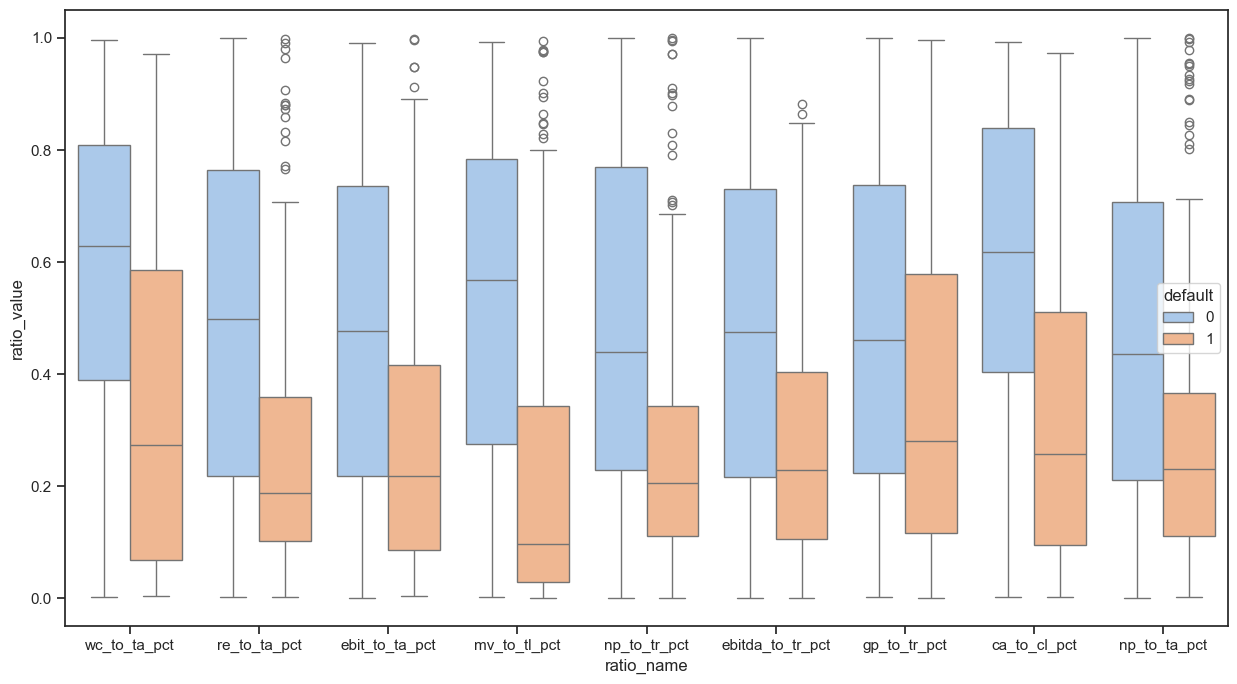

In [18]:
df_filtered_sample_by_status = df_balanced.melt(id_vars='default', value_vars=features[:-1],var_name='ratio_name',value_name='ratio_value')

plt.figure(figsize=(15, 8))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='default', data=df_filtered_sample_by_status)
plt.show()

In [ ]:
model = sm.Logit(y_train, x_train)
result = model.fit()

In [ ]:
predictions = result.predict(x_train)
predicted_classes = (predictions > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_train, predicted_classes)
conf_matrix = confusion_matrix(y_train, predicted_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
result.summary()